In [3]:
import pandas as pd
from textblob import TextBlob

In [4]:
data = pd.read_pickle("../data/corpus.pkl")
data.shape

(2, 2)

In [6]:
# Get polarity and subjectivity from TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data.content.apply(pol)
data['subjectivity'] = data.content.apply(sub)
data

,content,wing,polarity,subjectivity
left,trouble for the florida fanboy our legal syste...,left,0.117774,0.291817
right,tucker carlson tonight host tucker carlson unp...,right,-0.010505,0.308538


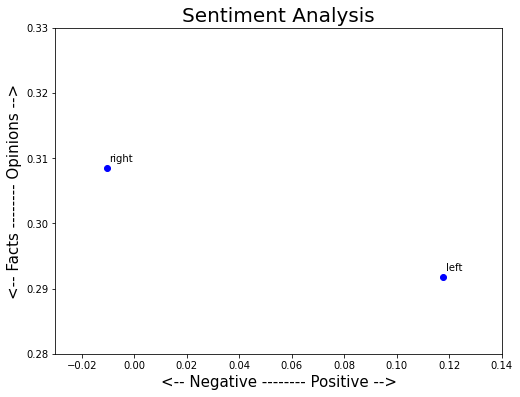

In [11]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]

for index, wing in enumerate(data.index):
    x = data.polarity.loc[wing]
    y = data.subjectivity.loc[wing]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['wing'][index], fontsize=10)
    plt.xlim(-.03, .14) 
    plt.ylim(.28, .33) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()